In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.pyplot as plt

import sys
sys.path.append("..")  

#for development purposes
%reload_ext autoreload
%autoreload 2
pd.options.display.float_format = '{:.4g}'.format

import enlopy as el

## Generate energy loads using monthly and daily profiles for a working and a non-working day

Create random monthly and daily loads

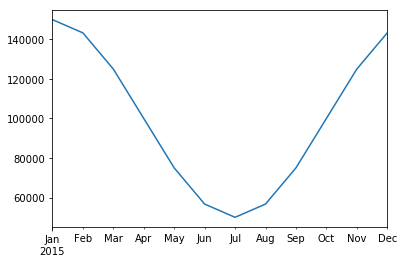

In [2]:
ML  = (np.cos(2 * np.pi/12 * np.linspace(0,11,12)) * 50 + 100 ) * 1000  # monthly load
ML = el.make_timeseries(ML) #convenience wrapper around pd.DataFrame with pd.DateTimeindex
ML.plot()

Create normalized random daily load for a working and non-working day

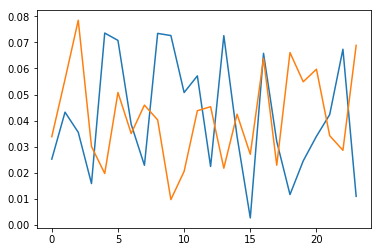

In [3]:
DWL =  np.random.rand(24) * 10 #daily load working
DWL = DWL / DWL.sum() # normalized

DNWL = np.random.rand(24) * 5 #daily load non working
DNWL = DNWL / DNWL.sum() #normalized daily load non working

plt.plot(DNWL)
plt.plot(DWL)

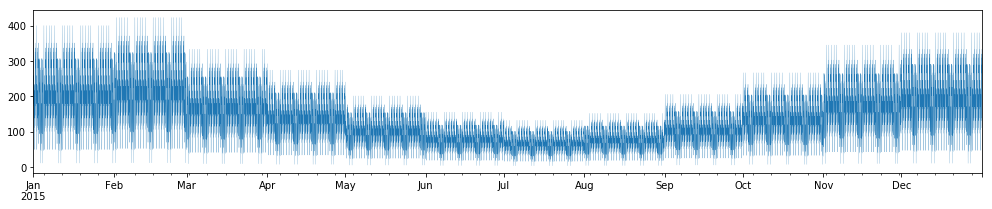

In [4]:
#Define the weighting factor of energy during working and non-working days.
Weight = .55 # i.e energy will be split 55% in working day 45% non working day

Load1 =  el.gen_load_from_daily_monthly(ML, DWL, DNWL, Weight)
Load1.name='House1'
Load1.plot(figsize=(17,3), linewidth =.2, grid = False);

Check if the total sum of energy is the same

In [5]:
print 'error = {:.2f}'.format(Load1.sum() - ML.sum())

error = 0.00


## Reshape (days - hours) and plot heatmap 

In [6]:
el.reshape_timeseries(Load1, x='month', y='hour')

month,1,2,3,4,5,6,7,8,9,10,11,12
hour,,,,,,,,,,,,
0,4756,4549,3964,3189,2359,1808,1598,1783,2392,3171,3954,4580
1,7899,7554,6583,5293,3922,3001,2652,2965,3970,5266,6569,7599
2,1.015e+04,9725,8460,6860,4981,3890,3447,3765,5145,6768,8413,9879
3,3981,3812,3318,2685,1959,1522,1348,1481,2014,2654,3302,3863
4,4986,4731,4155,3209,2612,1819,1583,1975,2406,3324,4215,4538
5,8367,7982,6973,5535,4228,3139,2760,3196,4152,5578,6995,7910
6,5394,5151,4495,3588,2705,2034,1793,2045,2691,3596,4499,5138
7,6025,5770,5021,4066,2961,2305,2042,2239,3050,4017,4995,5853
8,7287,6942,6073,4787,3717,2714,2381,2810,3590,4858,6109,6823


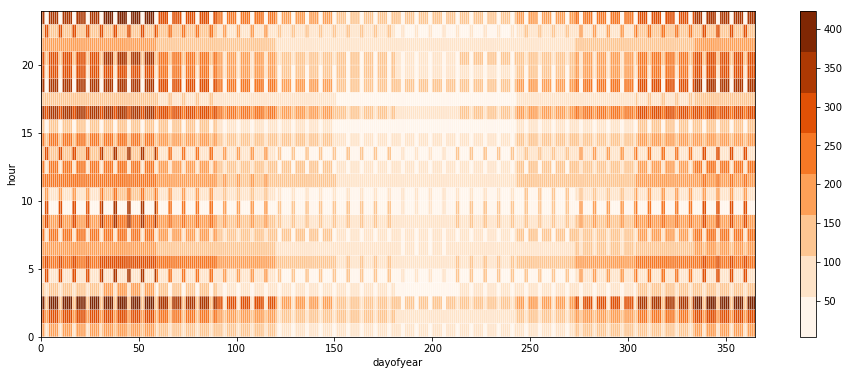

In [7]:
el.plot_heatmap(Load1)

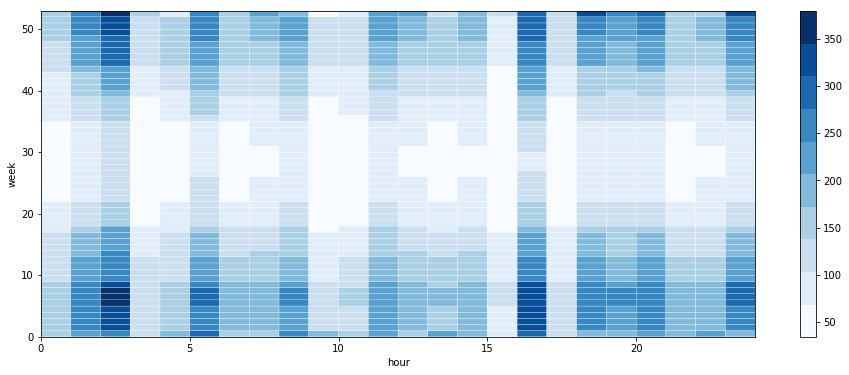

In [8]:
el.plot_heatmap(Load1, x='hour', y='week',bins=10, aggfunc='mean', palette='Blues')

### Plot percentiles

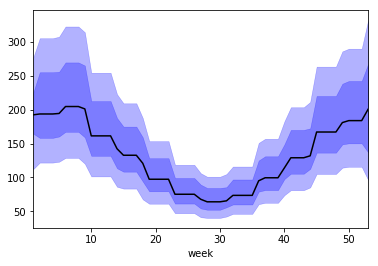

In [9]:
el.plot_percentiles(Load1, x='week', zz='hour')

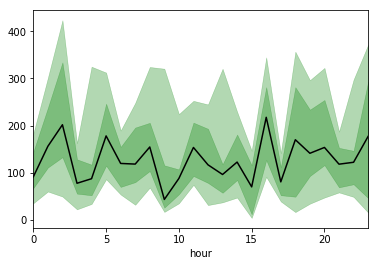

In [10]:
el.plot_percentiles(Load1, x='hour', zz='dayofyear', perc_list=[[1,99], [25,75], 50],color='green')

### 3d plots

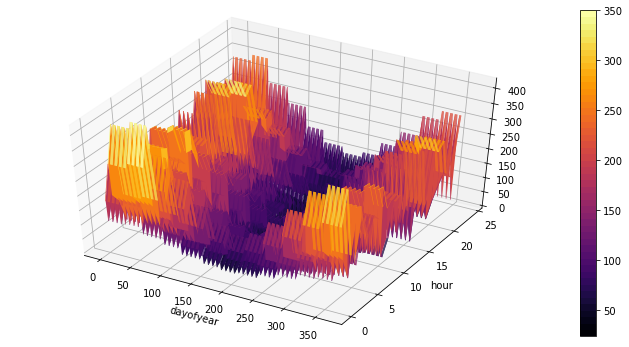

In [11]:
el.plot_3d(Load1, bins=50, palette='inferno')

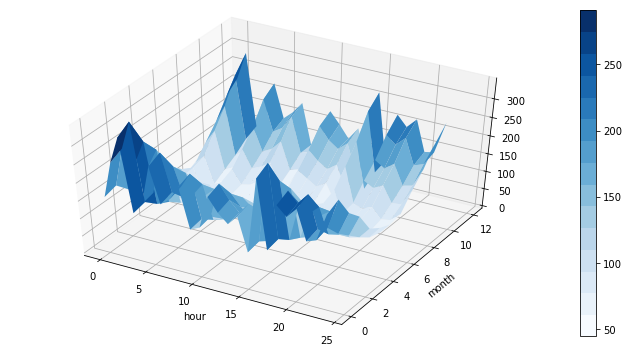

In [12]:
el.plot_3d(Load1, x='hour', y='month', aggfunc='mean', palette='Blues')

### Boxplot

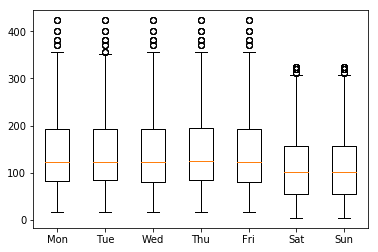

In [13]:
el.plot_boxplot(Load1, by='day')

### Rugplot

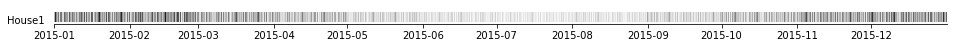

In [14]:
el.plot_rug(Load1, on_off=False, cmap='Greys')

It can accept a dataframe of timeseries and optionally normalize by the maximum value of the whole DataFrame


In [15]:
# Generate dummy dataframe of load profiles
df_many = pd.concat([Load1, 3 * Load1, Load1['Jun 2015':'Nov 2015']], axis=1)
df_many.columns = ['House1', 'House2', 'House3']

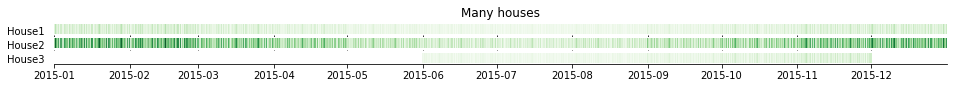

In [16]:
el.plot_rug(df_many, cmap='Greens', fig_title='Many houses', normalized=True)

## Archetypes

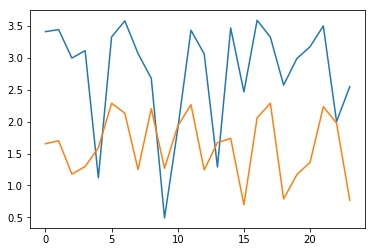

In [17]:
plt.plot(el.get_load_archetypes(Load1,2));

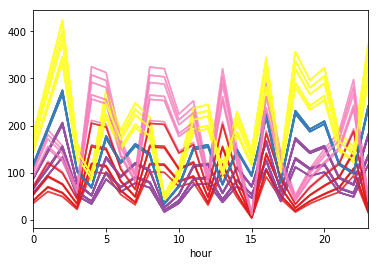

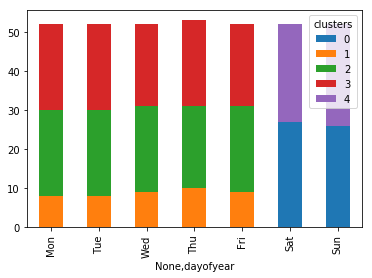

In [18]:
el.get_load_archetypes(Load1, 5, plot_diagnostics=True);

## Get and plot Load Duration Curve of load

In [19]:
el.get_LDC(Load1)

(array([  1.14155251e-04,   2.28310502e-04,   3.42465753e-04, ...,
          9.99771689e-01,   9.99885845e-01,   1.00000000e+00]),
 array([ 423.46585655,  423.46585655,  423.46585655, ...,    3.80607692,
           3.80607692,    3.80607692]))

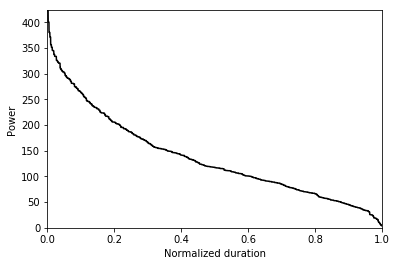

In [20]:
el.plot_LDC(Load1)

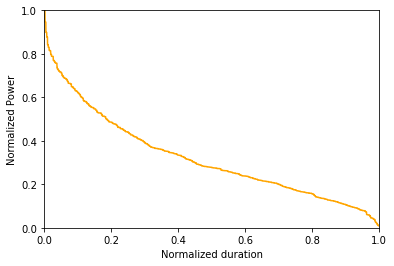

In [21]:
el.plot_LDC(Load1, y_norm=True, color='Orange')

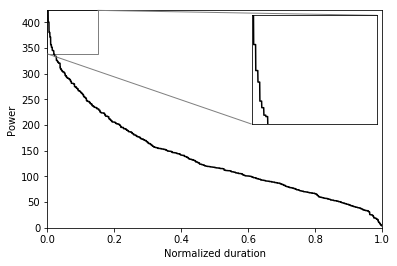

In [22]:
el.plot_LDC(Load1, zoom_peak=True)

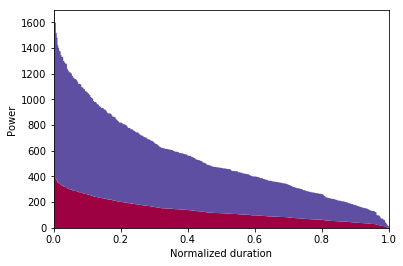

In [23]:
#Works also for 2-D
el.plot_LDC(df_many[['House1', 'House2']])

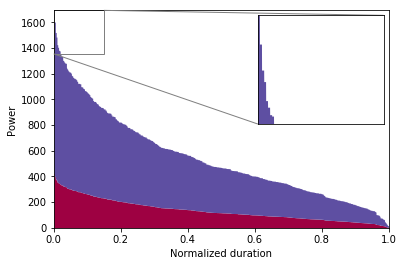

In [24]:
el.plot_LDC(df_many[['House1', 'House2']],zoom_peak=True)

# Add noise to a load

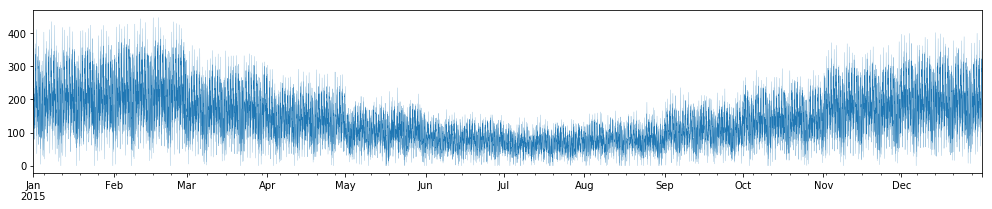

In [25]:
Load1_noise = el.add_noise(Load1, 3, 10) # Gauss Markov noise

fig = plt.figure(figsize=(14,3))

#plt.plot(Load1_noise,linewidth =.3)
Load1_noise.plot(figsize=(17,3), linewidth =.2, grid = False)
Load1_noise.name='Noisy'

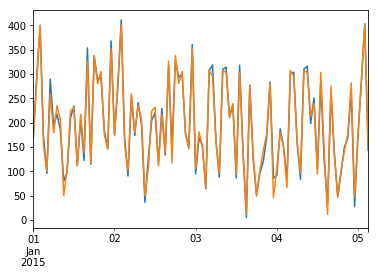

In [26]:
Load1_noise[0:100].plot()
Load1[0:100].plot()

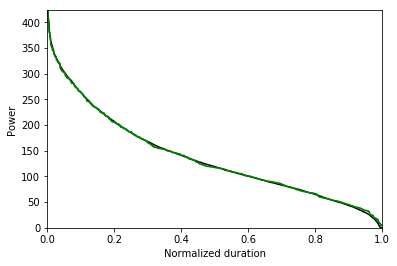

In [27]:
el.plot_LDC(Load1_noise)
el.plot_LDC(Load1, color='g')

## Gather statistics

In [28]:
el.get_load_stats(Load1)

,2015
Average,137
Biggest duration of consecutive zero load,0
Load Factor (peakiness),0.3235
Load ratio (max/min),111.3
Max,423.5
Min (2%),3.806
Periodicity,"(2190.0, 162.0)"
Ramps (98%),"(-205.783908664, 209.227320717)"
Sum,1.2e+06
Total Zero load duration,0


We can also check the statistics per defined time period. Example for month ('m'):

In [29]:
el.get_load_stats(Load1, per='m') 

,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12
Average,201.6,213.2,168,138.9,100.8,78.75,67.2,76.21,104.2,134.4,173.6,192.6
Biggest duration of consecutive zero load,0,0,0,0,0,0,0,0,0,0,0,0
Load Factor (peakiness),0.5031,0.5036,0.5031,0.5054,0.5,0.5054,0.5062,0.5,0.5054,0.5031,0.5022,0.5062
Load ratio (max/min),34.88,34.88,34.88,34.88,34.88,34.88,34.88,34.88,34.88,34.88,34.88,34.88
Max,400.7,423.5,333.9,274.8,201.6,155.8,132.8,152.4,206.1,267.1,345.7,380.5
Min (2%),11.49,12.14,9.574,7.879,5.78,4.467,3.806,4.37,5.909,7.659,9.912,10.91
Periodicity,"(186.0, 124.0)","(168.0, 112.0)","(186.0, 124.0)","(180.0, 120.0)","(186.0, 124.0)","(180.0, 120.0)","(186.0, 124.0)","(124.0, 22.0)","(180.0, 120.0)","(186.0, 124.0)","(180.0, 120.0)","(186.0, 124.0)"
Ramps (98%),"(-246.940690396, 240.899469807)","(-260.958297129, 254.574146201)","(-205.783908664, 200.749558172)","(-169.345738849, 165.20282112)","(-124.239630838, 121.200200541)","(-96.0168829162, 93.6679011866)","(-81.8070184595, 79.8056705103)","(-93.923056809, 91.62529898)","(-127.009304137, 123.90211584)","(-164.627126931, 160.599646538)","(-213.039110572, 207.827266954)","(-234.460993113, 228.725079048)"
Sum,1.5e+05,1.433e+05,1.25e+05,1e+05,7.5e+04,5.67e+04,5e+04,5.67e+04,7.5e+04,1e+05,1.25e+05,1.433e+05
Total Zero load duration,0,0,0,0,0,0,0,0,0,0,0,0


## Load Shifting

In [30]:
Load1_DR = el.gen_demand_response(Load1, 0.15, 0.30)

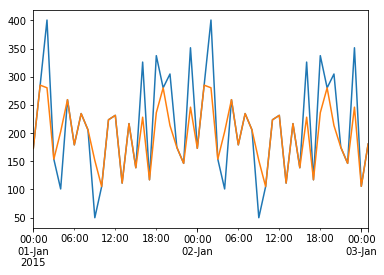

In [31]:
Load1[0:50].plot()
Load1_DR[0:50].plot()

In [32]:
el.get_load_stats(Load1)

,2015
Average,137
Biggest duration of consecutive zero load,0
Load Factor (peakiness),0.3235
Load ratio (max/min),111.3
Max,423.5
Min (2%),3.806
Periodicity,"(2190.0, 162.0)"
Ramps (98%),"(-205.783908664, 209.227320717)"
Sum,1.2e+06
Total Zero load duration,0


In [33]:
el.get_load_stats(Load1_DR) #it is less peaky as expected after the peak shaving

,2015
Average,134.9
Biggest duration of consecutive zero load,0
Load Factor (peakiness),0.4208
Load ratio (max/min),9.203
Max,320.6
Min (2%),34.83
Periodicity,"(2190.0, 42.0)"
Ramps (98%),"(-126.724986824, 113.090325035)"
Sum,1.182e+06
Total Zero load duration,0


## Sample new loads from load duration curve

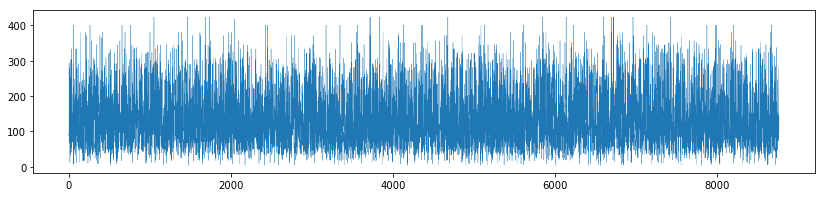

In [34]:
Load1a = el.gen_load_from_LDC(el.get_LDC(Load1))
fig = plt.figure(figsize=(14,3))
plt.plot(Load1a, linewidth =.3)

Check whether they have the same distribution

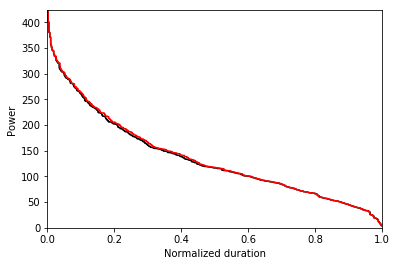

In [35]:
el.plot_LDC(Load1a)
el.plot_LDC(Load1,color='red')